<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2022/blob/main/ChannelFlows/DiskActuator/SensitivityAnalysis_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py &> /dev/null

import mpl_utils as mut
mut.config_plots()
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (14, 3.5) # (12.5,3) 

<img src="https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/ChannelFlows/DiskActuator/Figures/sub_domains.svg" width="500px" style="display:inline">

In [ ]:
def CardanoRoots( aa, bb ):
  # Cardano algorithm to solve our polynomial, see:
  # https://www.shsu.edu/kws006/professional/Concepts_files/SolvingCubics.pdf
  P = -2.0*aa
  Q = -2.0*bb
  Δ = (P/3.0)**3 + (Q/2)**2
  if Δ < 0.0: Δ = Δ + 0J
  β = ( -Q/2.0 - np.sqrt(Δ) )**(1.0/3.0)
  α = P/(3.0*β)
  ω = ( -1.0 + np.sqrt(3.0)*1J) / 2.0
  
  x1 = α - β
  x2 = (α*ω - β)*ω
  x3 = (α - β*ω)*ω

  if np.imag(x1) < 1E-15: x1 = np.real( x1 )
  if np.imag(x2) < 1E-15: x2 = np.real( x2 )
  if np.imag(x3) < 1E-15: x3 = np.real( x3 )

  # applies only for this solution 
  assert( np.imag( x1 ) == 0 )
  assert( np.imag( x2 ) == 0 )
  assert( np.imag( x3 ) == 0 )
  assert( x1 <= 0.0 )
  assert( x2 <= x3 )

  return (x2, x3)

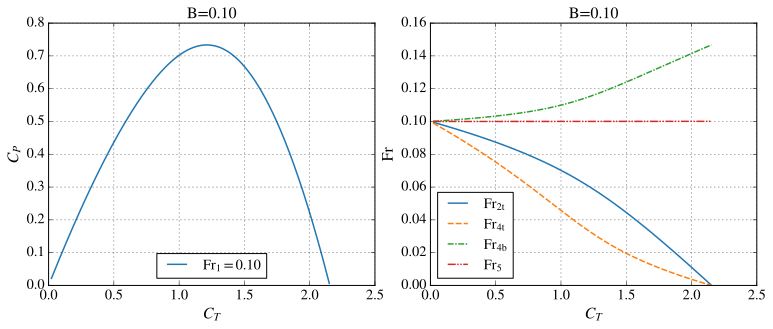

In [41]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.17 )

C_T_lst = []
C_P_lst = []
Fr2t_lst = []
Fr4b_lst = []
Fr4t_lst = []
Fr5_lst = []

B = 0.1
Fr1 = 0.1

for Fr4b in np.linspace( Fr1*1.001, Fr1*2.6, 1000 ):

  ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1
  
  C1 = Fr1 - Fr4b*ζ4
  C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
          + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

  Fr4t = ( C1 + np.sqrt(C2) ) / B
  ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
  ζ4b = ζ4 - ζ4t

  Fr2t = Fr4t*ζ4t/B
  C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
  C_P = C_T*Fr2t/Fr1

  mb = Fr4b*ζ4b + Fr4t*ζ4t
  bb = mb**2
  aa = (Fr4b**2*ζ4b + Fr4t**2*ζ4t + 1/2*ζ4**2)

  ζs = CardanoRoots( aa, bb )
  ζ5 = ζs[1]
  Fr5 = mb / ζ5
  
  if C_P <= 0.0: break

  C_P_lst.append( C_P )
  C_T_lst.append( C_T )

  Fr2t_lst.append( Fr2t )
  Fr4t_lst.append( Fr4t )
  Fr4b_lst.append( Fr4b )
  Fr5_lst.append( Fr5 )

ax1.set_title( "B=%.2f" % B )
ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.legend(loc="lower center");
#ax1.set_xticklabels( [] )
ax1.set_xlabel( "$C_T$" )
ax2.set_axisbelow(True)

ax2.set_title( "B=%.2f" % B )
ax2.plot( C_T_lst, Fr2t_lst, label="$\mathrm{Fr}_\mathrm{2t}$" )
ax2.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_\mathrm{4t}$" )
ax2.plot( C_T_lst, Fr4b_lst, label="$\mathrm{Fr}_\mathrm{4b}$" )
ax2.plot( C_T_lst, Fr5_lst, label="$\mathrm{Fr}_{5}$" )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$\mathrm{Fr}$" )
ax2.grid()
ax2.legend(loc="lower left")
ax2.set_axisbelow(True)

mpl.savefig('ChannelFlowLimits_Ex.pdf', bbox_inches='tight', pad_inches=0.02);

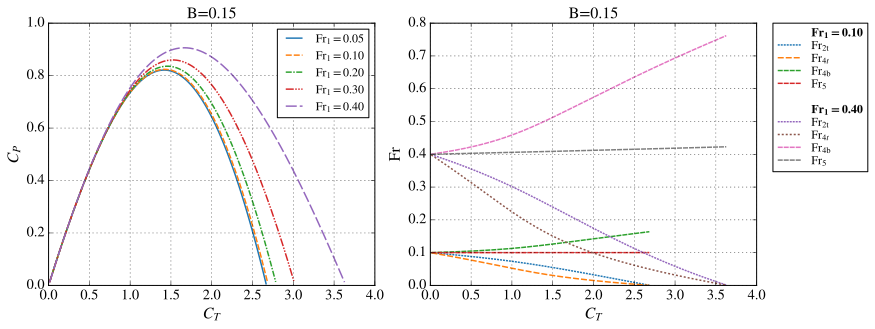

In [51]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.17 )

B = 0.15

for Fr1 in ( 0.05, 0.10, 0.20, 0.30, 0.40 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []
  Fr5_lst = []

  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    C1 = Fr1 - Fr4b*ζ4
    C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

    Fr4t = ( C1 + np.sqrt(C2) ) / B
    ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
    ζ4b = ζ4 - ζ4t
   
    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    mb = Fr4b*ζ4b + Fr4t*ζ4t
    bb = mb**2
    aa = (Fr4b**2*ζ4b + Fr4t**2*ζ4t + 1/2*ζ4**2)

    ζs = CardanoRoots( aa, bb )
    ζ5 = ζs[1]
    Fr5 = mb / ζ5
    
    if C_P <= 0.0: break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )
    Fr5_lst.append( Fr5 )

  ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )

  if Fr1 == 0.1 or Fr1 == 0.4:
    ax2.plot(np.NaN, np.NaN, '-', color='none', label="$\\bf \mathrm{\\bf Fr}_1=%.2f$" % Fr1 )

    ax2.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_\mathrm{2t}$" )
    ax2.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}$" )
    ax2.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_\mathrm{4b}$" )
    ax2.plot( C_T_lst, Fr5_lst, dashes=(5,1), label="$\mathrm{Fr}_\mathrm{5}$" )
    if Fr1 == 0.1: # empty entry in the legend 
        ax2.plot(np.NaN, np.NaN, '-', color='none', label=' ')

ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.set_title( "B=%.2f" % B );
ax1.set_xlabel( "$C_T$" )
ax1.legend(loc="upper right",fontsize=12 )
ax1.set_xlim( (0,4) )
ax1.set_ylim( (0,1) )

ax2.set_title( "B=%.2f" % B )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$\mathrm{Fr}$" )
ax2.grid()
ax2.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=12, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 )
ax2.set_xlim( (0,4) )
ax2.set_ylim( (0,0.8) )

mpl.savefig('Sensitivity_B%4.2f.pdf' % B, bbox_inches='tight', pad_inches=0.02);

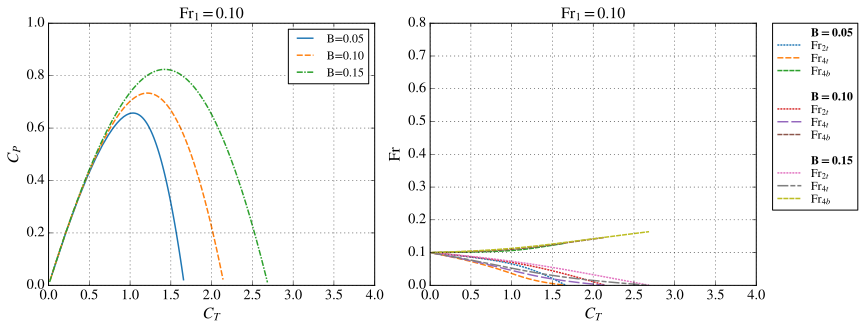

In [47]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.17 )

Fr1 = 0.10

for B in ( 0.05, 0.10, 0.15 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []
  Fr5_lst = []

  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    C1 = Fr1 - Fr4b*ζ4
    C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

    Fr4t = ( C1 + np.sqrt(C2) ) / B
    ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
    ζ4b = ζ4 - ζ4t

    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    mb = Fr4b*ζ4b + Fr4t*ζ4t
    bb = mb**2
    aa = (Fr4b**2*ζ4b + Fr4t**2*ζ4t + 1/2*ζ4**2)

    ζs = CardanoRoots( aa, bb )
    ζ5 = ζs[1]
    Fr5 = mb / ζ5
    
    if C_P <= 0.0: break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )

    Fr5_lst.append( Fr5 )

  ax1.plot( C_T_lst, C_P_lst, label="B=%.2f" % B )

  ax2.plot(np.NaN, np.NaN, '-', color='none', label="$\\bf {\\it\\bf B}=%.2f$" % B)
  ax2.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}$" )
  ax2.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}$" )
  ax2.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}$" )
  if B != 0.15: # empty entry in the legend 
      ax2.plot(np.NaN, np.NaN, '-', color='none', label=" ")

ax1.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.set_xlabel( "$C_T$" )
ax1.grid()
ax1.legend(loc="upper right",fontsize=12 )
ax1.set_xlim( (0,4) )
ax1.set_ylim( (0,1) )

ax2.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$\mathrm{Fr}$" )
ax2.grid()
ax2.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=12, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 )
ax2.set_xlim( (0,4) )
ax2.set_ylim( (0,0.8) )

mpl.savefig('Sensitivity_Fr%4.2f.pdf' % Fr1, bbox_inches='tight', pad_inches=0.02);